[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/alessandronascimento/BioMolComp/blob/main/P03/MSA1.ipynb)

#Alinhamento Múltiplo de Sequências (MSA)#

O alinhamento múltiplo de sequências é uma importante ferramenta para a caracterização de regiões conservadas em proteínas de uma família. Este tipo de alinhamento permite a comparação simultânea de sequências fazendo com que a predição de conservação de resíduos seja muito mais confiável. Além disso, o alinhamento múltiplo permite realização de analises filogenéticas de famílias de proteínas (assunto a ser abordado na próxima aula) que fornece informações sobre sua evolução.


##1. Alinhamento Progressivo com ClustalW

A primeira atividade irá utilizar a família das NTPDases que possuem 5 regiões conservadas entre seus diversos membros. Realizaremos o alinhamento múltiplo de diversos membros selecionados desta família. 

Neste primeiro momento, utilizaremos o programa **ClustalW**.

A biblioteca Biopython não tem o clustalw integrado, mas contém ferramentas que permitem executar o ClustalW, caso o programa esteja disponível na máquina local. 



### Preparando o Ambiente para a Execução

O código ao lado realiza a instalação do biopython no ambiente do Google Colab, além da importação de algumas bibliotecas que serão necessárias. 

Na sequência o código faz o download do clustalw a partir [deste link](http://www.clustal.org/download/current/clustalw-2.1-linux-x86_64-libcppstatic.tar.gz), permitindo que seja executado pelo biopython. 

In [ ]:
#@title Preparando o Ambiente para a Execução

# Installing Biopython and importing required libraries...

!pip3 install biopython
from Bio import SeqIO
from Bio.Align.Applications import ClustalwCommandline
from google.colab import files
import os

# Gettting ClustalW2....

!wget http://www.clustal.org/download/current/clustalw-2.1-linux-x86_64-libcppstatic.tar.gz
!tar -xzf clustalw-2.1-linux-x86_64-libcppstatic.tar.gz
!mv clustalw-2.1-linux-x86_64-libcppstatic/clustalw2 .


### Upload das Sequências que Serão Alinhadas

Nesta seção, faremos o upload das sequências das proteínas da família das NTPDases para o posterior alinhamento. Neste notebook, assumimos que as sequências estão em formato **fasta**.

O arquivo que usaremos está disponível [aqui](https://raw.githubusercontent.com/alessandronascimento/BioMolComp/main/P03/seqs.fasta). Clique no link e abra em nova aba para visualizar as sequências.

In [ ]:
seq_file="seqs.fasta"
!wget https://raw.githubusercontent.com/alessandronascimento/BioMolComp/main/P03/seqs.fasta
!ls

###Inspecionando as sequências que serão alinhadas

Nesta próxima seção, vamos inspecionar o nosso arquivo fasta, que contem múltiplas sequências. Vamos usar as funções do Biopython (SeqIO) para isto.

Cada sequência é escaneada pela função *SeqIO.parse*. Delas, podemos listar a própria sequência, o cabeçalho (Id) e o número e resíduos na sequência, por exemplo. 

In [ ]:
count=0
for seq_record in SeqIO.parse(seq_file, "fasta"):
    count = count+1
    print("SeqID: %s" % seq_record.id)
    print(repr(seq_record.seq))
    print("Sequence Length: %d" % len(seq_record))
print("")    
print("Number of sequences found: %d" % count);

###Alinhamento das Sequências com o ClustalW

Nesta seção, faremos o alinhamento pelo método progressivo, usando o software *ClustalW*. 

No método progressivo, as sequencias são inicialmente alinhadas par a par e uma **distância** entre as sequências é calculada baseada no score do alinhamento (maior score significa maior similaridade e menor distância entre as sequências). Em seguida, um alinhamento múltiplo é construído pela adição progressiva das sequências, iniciando pelas mais próximas.

O programa [ClustalW](http://www.clustal.org/clustal2/) foi descontinuado, mas ainda pode ser obtido. Em seu lugar, foi lançado o programa [Clustal Omega](http://www.clustal.org/omega/), que emprega modelos de Marvok (HMM) para o alinhamento mais rápido e preciso, partcularmente quando o número de sequências a ser alinhado é grande.

Na seção abaixo, o biopython invoca o clustalw2 (que já baixamos e deixamos na pasta local) e passa o arquivo fasta com as múltiplas sequências como argumento.


In [4]:
clustalw_exe = r"./clustalw2"
clustalw_cline = ClustalwCommandline(clustalw_exe, infile=seq_file)
assert os.path.isfile(clustalw_exe), "Clustal W executable missing"
stdout, stderr = clustalw_cline()



### Inspecionando o Alinhamento

Com sorte, o alinhamento já foi realizado pelo ClustalW. Dois arquivos devem ter sido escritos como arquivos de saída do clustalw: um arquivo com estensão .aln e um arquivo com extensão .dnd.

O primeiro arquivo contém o MSA. O segundo contém as distâncias entre as sequências do MSA. Vamos analisar os dois. 

Primeiramente, vamos usar o *parser* do BioPython para abrir o arquivo .aln e printar o alinhamento.

In [ ]:
from Bio import AlignIO
align = AlignIO.read("seqs.aln", "clustal")
for record in align:
  print("%s - %s" % (record.seq, record.id))

Os dados da literatura indicam que cinco regiões da sequência são conservadas na família das NTPDases. Estas regiões estão mostradas na figura abaixo. 

**Q1. Você consegue identificar estas regiões (todas elas) no seu alinhamento? Elas aparecem como regiões conservadas em todas as sequências?**



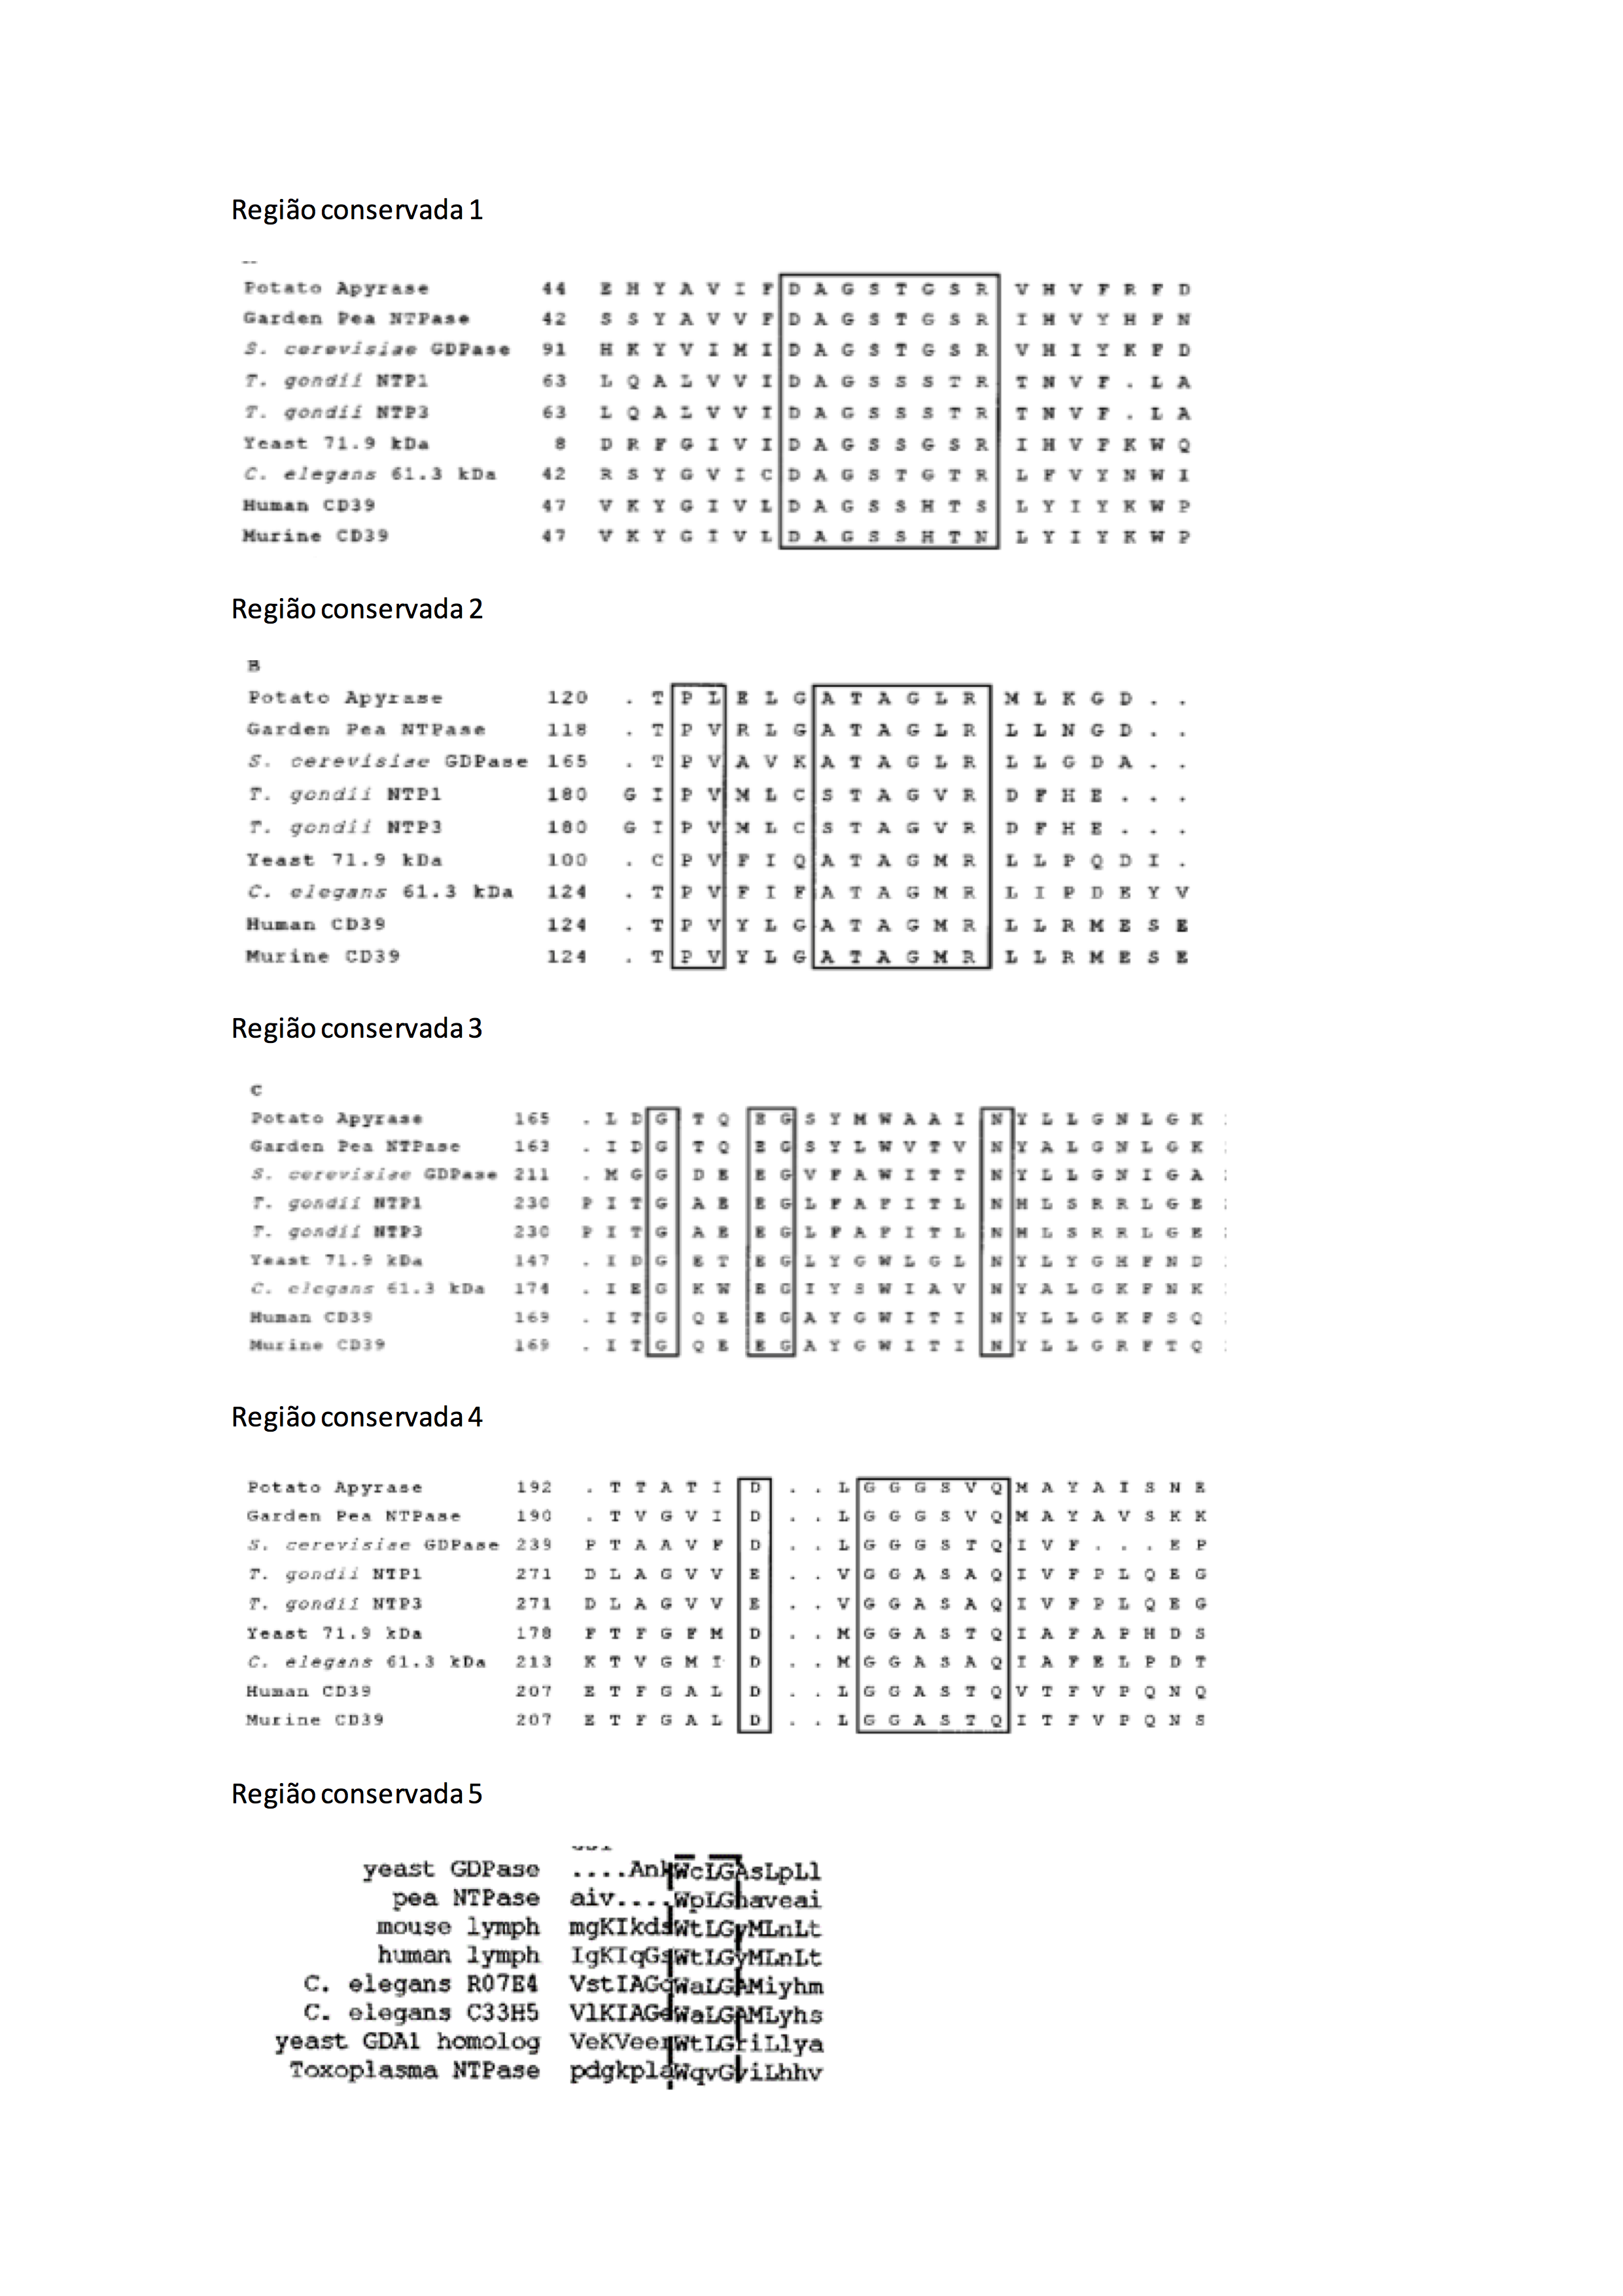

### Analisando as distâncias entre as sequências

Uma vez que usamos um método progressivo e que as distâncias entre as sequências foram calculadas, podemos analisar, graficamente, estas distâncias através da construção de uma árvore. A*LERTA DE SPOILER*: Este é o princípio da análise filogenética que veremos em aulas seguintes.

Vamos usar o Biopython para analisar o arquivo .dnd pela construção de uma árvore de distâncias.

In [ ]:
from Bio import Phylo
tree = Phylo.read("seqs.dnd", "newick")
Phylo.draw_ascii(tree)

### Alterando o Peso do *Gap*

Podemos usar um peso diferente para a abertura do *gap* e para a extensão de um *gap* já aberto. Vamos usar por exemplo um peso de 2.0 para a abertura de um gap e de 0.1 para a propagação deste gap. 

In [ ]:
clustalw_exe = r"./clustalw2"
clustalw_cline = ClustalwCommandline(clustalw_exe, infile=seq_file, gapopen=2, gapext=0.1)
assert os.path.isfile(clustalw_exe), "Clustal W executable missing"
stdout, stderr = clustalw_cline()

from Bio import AlignIO
align = AlignIO.read("seqs.aln", "clustal")
for record in align:
  print("%s - %s" % (record.seq, record.id))

###Outros pesos para o *Gap*

Experimento mudar o peso de gap e observar o que acontece no alinhamento, alterando a célula acima e executando esta célula novamente.